In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('Obesity Classification Edited.csv')
df.drop('ID', inplace=True, axis=1)
print('Sample Data:')
df.head(110)

Sample Data:


,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,Normal Weight
1,30,2,160,60,22.5,Normal Weight
2,35,1,180,90,27.3,Overweight
3,40,2,150,50,20.0,Underweight
4,45,1,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,1,175,10,3.9,Underweight
104,16,2,160,10,3.9,Underweight
105,21,1,180,15,5.6,Underweight
106,26,2,150,15,5.6,Underweight


In [31]:
X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = rf.predict(X_test)
try:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

except ValueError as e:
    print("Error:", str(e))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


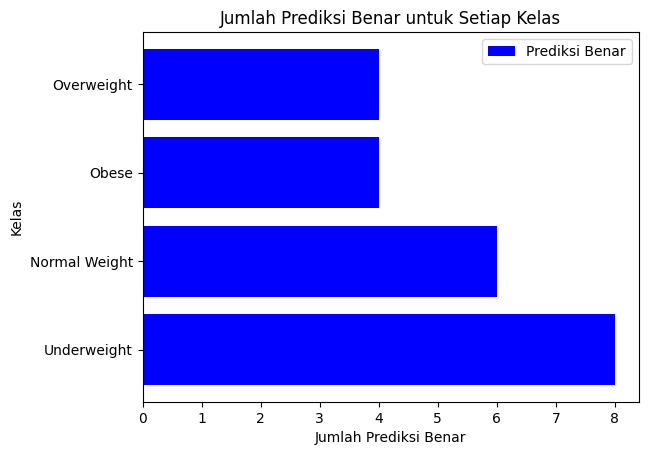

In [35]:
correct_predictions = y_test[y_test == y_pred]

class_counts = y_test.value_counts()

classes = class_counts.index.tolist()

correct_counts = [len(correct_predictions[correct_predictions == cls]) for cls in classes]

plt.barh(classes, correct_counts, color='blue', label='Prediksi Benar')
plt.xlabel('Jumlah Prediksi Benar')
plt.ylabel('Kelas')
plt.title('Jumlah Prediksi Benar untuk Setiap Kelas')
plt.legend()
plt.show()
